In [1]:
import numpy
from scipy.linalg import solve

In [2]:
def generateMatrix(N, sigma):
    """ Computes the matrix for the diffusion equation with Crank-Nicolson
        Dirichlet condition at i=0, Neumann at i=-1
    
    Parameters:
    ----------
    N: int
        Number of discretization points
    sigma: float 
        alpha*dt/dx^2
    
    Returns:
    -------
    A: 2D numpy array of float
        Matrix for diffusion equation
    """
   
    # Setup the diagonal
    d = 2*numpy.diag(numpy.ones(N-2)*(1+1./sigma))
    
    # Consider Neumann BC
    d[-1,-1] = 1+2./sigma
    
    # Setup upper diagonal
    ud = numpy.diag(numpy.ones(N-3)*-1, 1)
    
    # Setup lower diagonal
    ld = numpy.diag(numpy.ones(N-3)*-1, -1)
    
    A = d + ud + ld
    
    return A

In [3]:
def generateRHS(T, sigma):
    """ Computes right-hand side of linear system for diffusion equation
        with backward Euler
    
    Parameters:
    ----------
    T: array of float
        Temperature at current time step
    sigma: float
        alpha*dt/dx^2
    
    Returns:
    -------
    b: array of float
        Right-hand side of diffusion equation with backward Euler
    """
    
    b = T[1:-1]*2*(1./sigma-1) + T[:-2] + T[2:]
    # Consider Dirichlet BC
    b[0] += T[0]
    
    return b

In [4]:
def CrankNicolson(T, A, nt, sigma):
    """ Advances diffusion equation in time with Crank-Nicolson
   
    Parameters:
    ----------
    T: array of float
        initial temperature profile
    A: 2D array of float
        Matrix with discretized diffusion equation
    nt: int
        number of time steps
    sigma: float
        alpha*td/dx^2
        
    Returns:
    -------
    T: array of floats
        temperature profile after nt time steps
    """
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS(Tn, sigma)
        # Use numpy.linalg.solve
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        # Enforce Neumann BC (Dirichlet is enforced automatically)
        T[-1] = T[-2]

    return T

In [5]:
L = 1
nx = 21
alpha = 1.22e-3

dx = L/(nx-1)

Ti = numpy.zeros(nx)
Ti[0] = 100

sigma = 0.5
dt = sigma * dx*dx/alpha 
nt = 10

A = generateMatrix(nx, sigma)

In [6]:
print(A)

[[ 6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [-1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.  0.  0.  0.
   0.]
 [ 0.  0.  0.  0.  0.  0.  0

In [7]:
T = CrankNicolson(Ti.copy(), A, nt, sigma)

In [8]:
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

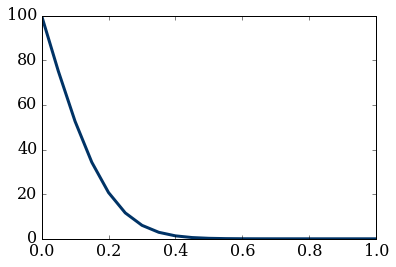

In [9]:
x = numpy.linspace(0,L,nx)

pyplot.plot(x, T, color='#003366', ls='-', lw=3);

In [10]:
from math import pi
def T_analytical(x, t, n_max, alpha, L):
    """Computes the exact solution for 1D diffusion with T=100 at x=0 and dT/dx=0 at x=L
        
    Paramters:
    ---------
    x    : array of float
        Spatial position
    t    : float
        Evaluation time
    n_max: int 
        Number of terms to evaluate expression
    alpha: float
        diffusion coefficient
    L    : float
        Size of rod
        
    Returns:
    -------
    T    : array of float
        Temperature at each location x
    """
    T = 100
    for n in range(1,n_max+1):
        k = (2*n-1)*pi/(2*L)
        
        summation = 400/((2*n-1)*pi) * numpy.sin(k*x) * numpy.exp(-alpha*k*k*t)
        T -= summation

    return T    

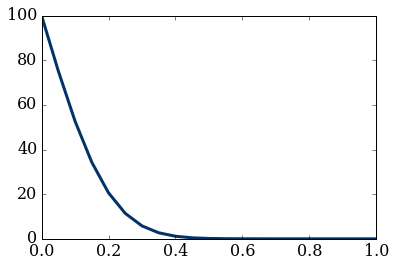

In [11]:
T_exact = T_analytical(x, dt*nt, 100, alpha, L)
pyplot.plot(x, T_exact, color='#003366', ls='-', lw=3);

In [12]:
T1 = T_analytical(x, .2, 100, alpha, L)
T2 = T_analytical(x, .2, 200, alpha, L)
numpy.sqrt(numpy.sum((T1-T2)**2)/numpy.sum(T2**2))

6.9279171182600926e-13

In [13]:
def L2_error(T, T_exact):
    """Computes L2 norm of error
    
    Parameters:
    ----------
    T      : array of float
        array with numerical solution
    T_exact: array of float
        array with exact solution
    Returns:
    -------
    e: L2 norm of error
    """
    
    e = numpy.sqrt(numpy.sum((T-T_exact)**2)/numpy.sum(T_exact)**2)
    
    return e

In [14]:
def generateMatrix_btcs(N, sigma):
    """ Computes the matrix for the diffusion equation with backward Euler
        Dirichlet condition at i=0, Neumann at i=-1
    
    Parameters:
    ----------
    T: array of float
        Temperature at current time step
    sigma: float 
        alpha*dt/dx^2
    
    Returns:
    -------
    A: 2D numpy array of float
        Matrix for diffusion equation
    """
   
    # Setup the diagonal
    d = numpy.diag(numpy.ones(N-2)*(2+1./sigma))
    
    # Consider Neumann BC
    d[-1,-1] = 1+1./sigma
    
    # Setup upper diagonal
    ud = numpy.diag(numpy.ones(N-3)*-1, 1)
    
    # Setup lower diagonal
    ld = numpy.diag(numpy.ones(N-3)*-1, -1)
    
    A = d + ud + ld
    
    return A

In [15]:
def generateRHS_btcs(T, sigma):
    """ Computes right-hand side of linear system for diffusion equation
        with backward Euler
    
    Parameters:
    ----------
    T: array of float
        Temperature at current time step
    sigma: float
        alpha*dt/dx^2
    
    Returns:
    -------
    b: array of float
        Right-hand side of diffusion equation with backward Euler
    """
    b = numpy.zeros_like(T)
    
    b = T[1:-1]*1./sigma
    # Consider Dirichlet BC
    b[0] += T[0]
    
    return b

In [16]:
def implicit_btcs(T, A, nt, sigma):
    """ Advances diffusion equation in time with implicit central scheme
   
    Parameters:
    ----------
    T: array of float
        initial temperature profile
    A: 2D array of float
        Matrix with discretized diffusion equation
    nt: int
        number of time steps
    sigma: float
        alpha*td/dx^2
        
    Returns:
    -------
    T: array of floats
        temperature profile after nt time steps
    """
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS_btcs(Tn, sigma)
        # Use numpy.linalg.solve
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        # Enforce Neumann BC (Dirichlet is enforced automatically)
        T[-1] = T[-2]

    return T

In [17]:
nx = 1001
dx = L/(nx-1)

dt_values = numpy.asarray([1.0, 0.5, 0.25, 0.125])
error = numpy.zeros(len(dt_values))
error_btcs = numpy.zeros(len(dt_values))

t_final = 10
t_initial = 1

x = numpy.linspace(0,L,nx)

Ti =  T_analytical(x, t_initial, 100, alpha, L)
T_exact = T_analytical(x, t_final, 100, alpha, L)

for i,dt in enumerate(dt_values):
    sigma = alpha*dt/dx**2

    nt = int((t_final-t_initial)/dt)
    
    A = generateMatrix(nx, sigma)
    
    A_btcs = generateMatrix_btcs(nx, sigma)

    T = CrankNicolson(Ti.copy(), A, nt, sigma)
    
    error[i] = L2_error(T,T_exact)
    
    T = implicit_btcs(Ti.copy(), A_btcs, nt, sigma)
    
    error_btcs[i] = L2_error(T,T_exact)

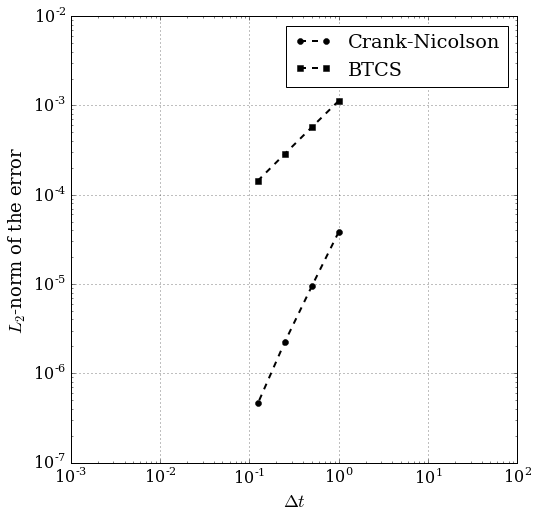

In [18]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r'$\Delta t$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values, error, color='k', ls='--', lw=2, marker='o')
pyplot.loglog(dt_values, error_btcs, color='k', ls='--', lw=2, marker='s')
pyplot.legend(['Crank-Nicolson', 'BTCS']);

In [19]:
nx_values = numpy.asarray([11, 21, 41, 81, 161])

dt = 0.1
error = numpy.zeros(len(nx_values))

t_final = 20

x = numpy.linspace(0,L,nx)

for i,nx in enumerate(nx_values):
    
    dx = L/(nx-1)
    x = numpy.linspace(0,L,nx)
   
    sigma = alpha*dt/dx**2

    nt = int(t_final/dt)
    
    A = generateMatrix(nx, sigma)

    Ti = numpy.zeros(nx)
    Ti[0] = 100
      
    T = CrankNicolson(Ti.copy(), A, nt, sigma)
    
    T_exact = T_analytical(x, t_final, 100, alpha, L)
    
    error[i] = L2_error(T,T_exact)

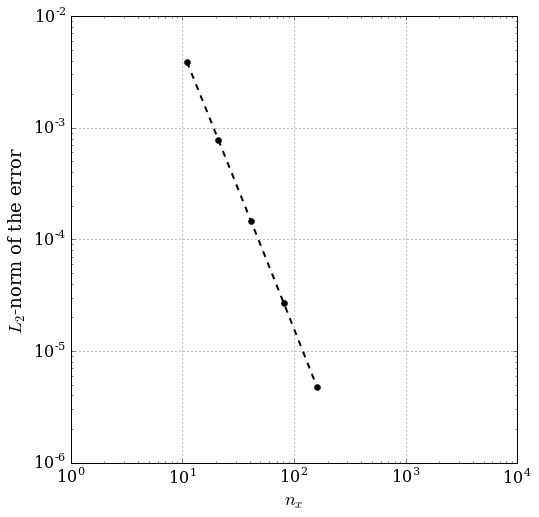

In [20]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(nx_values, error, color='k', ls='--', lw=2, marker='o');

In [21]:
nx_values = numpy.asarray([11, 21, 41, 81, 161])

dt = 0.1
error = numpy.zeros(len(nx_values))

t_final = 1000

x = numpy.linspace(0,L,nx)

for i,nx in enumerate(nx_values):
    
    dx = L/(nx-1)
    x = numpy.linspace(0,L,nx)
   
    sigma = alpha*dt/dx**2

    nt = int(t_final/dt)
    
    A = generateMatrix(nx, sigma)

    Ti = numpy.zeros(nx)
    Ti[0] = 100
      
    T = CrankNicolson(Ti.copy(), A, nt, sigma)
    
    T_exact = T_analytical(x, t_final, 100, alpha, L)
    
    error[i] = L2_error(T,T_exact)

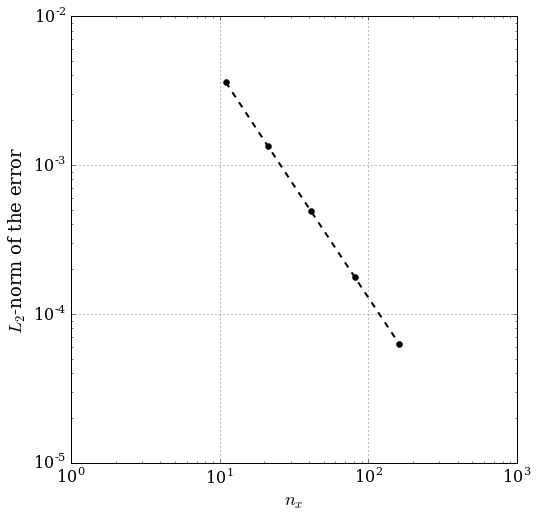

In [22]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.xlim(1, 1000)
pyplot.ylim(1e-5, 1e-2)
pyplot.loglog(nx_values, error, color='k', ls='--', lw=2, marker='o');

In [23]:
error

array([  3.59569224e-03,   1.34923182e-03,   4.90905474e-04,
         1.76021088e-04,   6.26681531e-05])